# Лабораторная работа №1

### Используемые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

### Используемые алгоритмы

In [2]:
params = ('age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium')

def hists (hist_params):
    n_bins = 20
    fig, axs = plt.subplots(2,3)
    for i in range(0, len(params)):
        axis = axs[int(i / 3), i % 3]
        axis.hist(hist_params[i], bins=n_bins)
        axis.set_title(params[i])
    plt.show()

### Исходные данные:
[`heart_failure_clinical_records_dataset.csv`](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)

## Загрузка данных

In [3]:
frame = pd.read_csv('heart_failure_clinical_records_dataset.csv').drop(columns=['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])
print(f"Исходные наборы данных:\n{ frame }")

Исходные наборы данных:
      age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  
0                 1.9           130  
1                 1.1           136  
2                 1.3           1

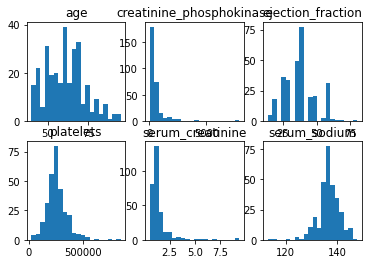

In [4]:
hists((frame['age'].values, frame['creatinine_phosphokinase'].values, frame['ejection_fraction'].values, frame['platelets'].values, frame['serum_creatinine'].values, frame['serum_sodium'].values))

In [5]:
data = frame.to_numpy(dtype='float')

[[7.5000000e+01 5.8200000e+02 2.0000000e+01 2.6500000e+05 1.9000000e+00
  1.3000000e+02]
 [5.5000000e+01 7.8610000e+03 3.8000000e+01 2.6335803e+05 1.1000000e+00
  1.3600000e+02]
 [6.5000000e+01 1.4600000e+02 2.0000000e+01 1.6200000e+05 1.3000000e+00
  1.2900000e+02]
 ...
 [4.5000000e+01 2.0600000e+03 6.0000000e+01 7.4200000e+05 8.0000000e-01
  1.3800000e+02]
 [4.5000000e+01 2.4130000e+03 3.8000000e+01 1.4000000e+05 1.4000000e+00
  1.4000000e+02]
 [5.0000000e+01 1.9600000e+02 4.5000000e+01 3.9500000e+05 1.6000000e+00
  1.3600000e+02]]


## Стандартизация данных

In [6]:
scaler = preprocessing.StandardScaler().fit(data[:150,:])
scaled = scaler.transform(data)

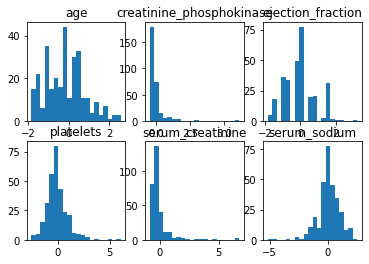

In [7]:
hists((scaled[:,0], scaled[:,1], scaled[:,2], scaled[:,3], scaled[:,4], scaled[:,5]))

In [8]:
for index, param in enumerate(params):
    print(f"Математическое ожидание параметра { param }:")
    print(f"До стандартизации: { data[:,index].mean() }")
    print(f"После стандартизации: { scaled[:,index].mean() }\n")

Математическое ожидание параметра age:
До стандартизации: 60.83389297658862
После стандартизации: -0.16970362369106984

Математическое ожидание параметра creatinine_phosphokinase:
До стандартизации: 581.8394648829432
После стандартизации: -0.021276750290383013

Математическое ожидание параметра ejection_fraction:
До стандартизации: 38.08361204013378
После стандартизации: 0.01050249484809085

Математическое ожидание параметра platelets:
До стандартизации: 263358.02926421404
После стандартизации: -0.035228788194085287

Математическое ожидание параметра serum_creatinine:
До стандартизации: 1.3938795986622072
После стандартизации: -0.10864080163893569

Математическое ожидание параметра serum_sodium:
До стандартизации: 136.62541806020067
После стандартизации: 0.03790759894920013



In [9]:
for index, param in enumerate(params):
    print(f"Среднеквадратичное отклонение параметра { param }:")
    print(f"До стандартизации: { data[:,index].std() }")
    print(f"После стандартизации: { scaled[:,index].std() }\n")

Среднеквадратичное отклонение параметра age:
До стандартизации: 11.874901429842655
После стандартизации: 0.9538237876978354

Среднеквадратичное отклонение параметра creatinine_phosphokinase:
До стандартизации: 968.6639668032415
После стандартизации: 0.8141790488228113

Среднеквадратичное отклонение параметра ejection_fraction:
До стандартизации: 11.815033462318585
После стандартизации: 0.9061082161919123

Среднеквадратичное отклонение параметра platelets:
До стандартизации: 97640.54765451424
После стандартизации: 1.0150611342848024

Среднеквадратичное отклонение параметра serum_creatinine:
До стандартизации: 1.0327786652795918
После стандартизации: 0.8854288727548568

Среднеквадратичное отклонение параметра serum_sodium:
До стандартизации: 4.405092379513557
После стандартизации: 0.9703735961735016



In [10]:
print(f"scaler.mean_ = { scaler.mean_ }")
print(f"scaler.var_ = { scaler.var_ }")

scaler.mean_ = [6.29466667e+01 6.07153333e+02 3.79466667e+01 2.66746749e+05
 1.52060000e+00 1.36453333e+02]
scaler.var_ = [1.54997156e+02 1.41548882e+06 1.70023822e+02 9.25286050e+09
 1.36052697e+00 2.06078222e+01]


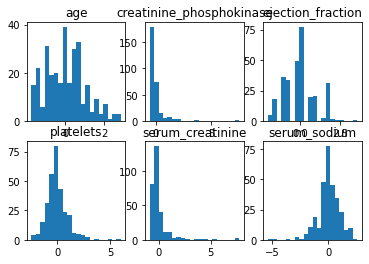

In [11]:
scaled = preprocessing.StandardScaler().fit_transform(data)
hists((scaled[:,0], scaled[:,1], scaled[:,2], scaled[:,3], scaled[:,4], scaled[:,5]))

## Приведение к диапазону

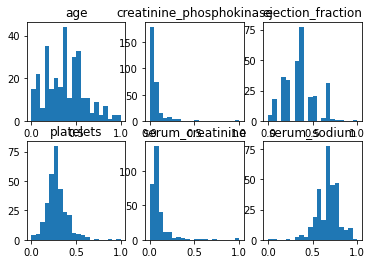

In [12]:
scaler = preprocessing.MinMaxScaler().fit(data)
scaled = scaler.transform(data)
hists((scaled[:,0], scaled[:,1], scaled[:,2], scaled[:,3], scaled[:,4], scaled[:,5]))

In [13]:
for index, param in enumerate(params):
    print(f"Признак { param }:")
    print(f"Минимальное значение: { scaler.data_min_ }")
    print(f"Минимальное значение: { scaler.data_max_ }\n")

Признак age
Минимальное значение: [4.00e+01 2.30e+01 1.40e+01 2.51e+04 5.00e-01 1.13e+02]
Минимальное значение: [9.500e+01 7.861e+03 8.000e+01 8.500e+05 9.400e+00 1.480e+02]

Признак creatinine_phosphokinase
Минимальное значение: [4.00e+01 2.30e+01 1.40e+01 2.51e+04 5.00e-01 1.13e+02]
Минимальное значение: [9.500e+01 7.861e+03 8.000e+01 8.500e+05 9.400e+00 1.480e+02]

Признак ejection_fraction
Минимальное значение: [4.00e+01 2.30e+01 1.40e+01 2.51e+04 5.00e-01 1.13e+02]
Минимальное значение: [9.500e+01 7.861e+03 8.000e+01 8.500e+05 9.400e+00 1.480e+02]

Признак platelets
Минимальное значение: [4.00e+01 2.30e+01 1.40e+01 2.51e+04 5.00e-01 1.13e+02]
Минимальное значение: [9.500e+01 7.861e+03 8.000e+01 8.500e+05 9.400e+00 1.480e+02]

Признак serum_creatinine
Минимальное значение: [4.00e+01 2.30e+01 1.40e+01 2.51e+04 5.00e-01 1.13e+02]
Минимальное значение: [9.500e+01 7.861e+03 8.000e+01 8.500e+05 9.400e+00 1.480e+02]

Признак serum_sodium
Минимальное значение: [4.00e+01 2.30e+01 1.40e+01 

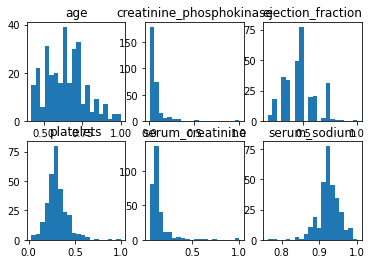

{'copy': True}


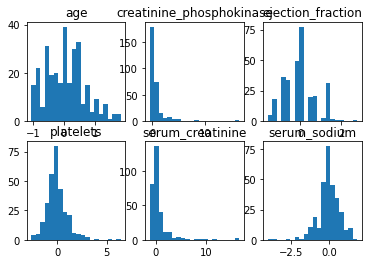

In [14]:
scaler = preprocessing.MaxAbsScaler().fit(data)
scaled = scaler.transform(data)
hists((scaled[:,0], scaled[:,1], scaled[:,2], scaled[:,3], scaled[:,4], scaled[:,5]))
print(f"{scaler.get_params()}")

scaler = preprocessing.RobustScaler().fit(data)
scaled = scaler.transform(data)
hists((scaled[:,0], scaled[:,1], scaled[:,2], scaled[:,3], scaled[:,4], scaled[:,5]))

In [15]:
# function??

## Нелинейные преобразования

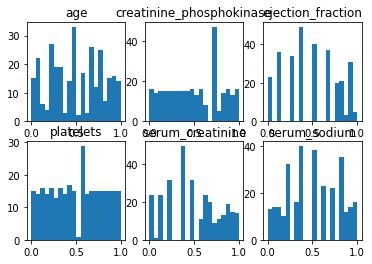

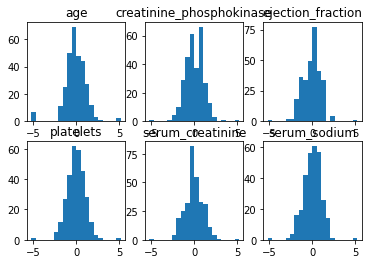

In [16]:
scaled = preprocessing.QuantileTransformer(n_quantiles=100, random_state=0).fit_transform(data)
hists((scaled[:,0], scaled[:,1], scaled[:,2], scaled[:,3], scaled[:,4], scaled[:,5]))

scaled = preprocessing.QuantileTransformer(n_quantiles=100, random_state=0, output_distribution="normal").fit_transform(data)
hists((scaled[:,0], scaled[:,1], scaled[:,2], scaled[:,3], scaled[:,4], scaled[:,5]))

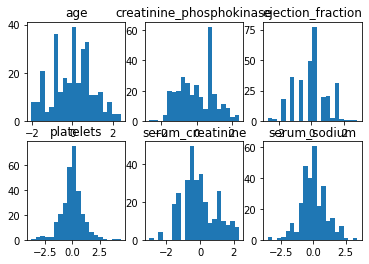

In [17]:
scaled = preprocessing.PowerTransformer().fit_transform(data)
hists((scaled[:,0], scaled[:,1], scaled[:,2], scaled[:,3], scaled[:,4], scaled[:,5]))

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

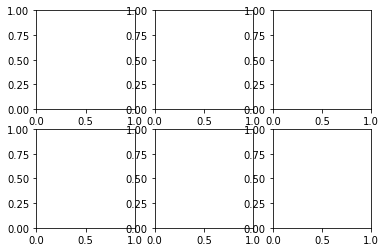

In [18]:
scaler = preprocessing.KBinsDiscretizer(n_bins=(3, 4, 3, 10, 2, 4 )).fit(data)
scaled = scaler.transform(data)
n_bins = (3, 4, 3, 10, 2, 4 )
fig, axs = plt.subplots(2,3)
for i in range(0, len(params)):
    axis = axs[int(i / 3), i % 3]
    axis.hist(scaled[:,i], bins=n_bins[i])
    axis.set_title(params[i])
plt.show()

In [19]:
print(f"{scaler.bin_edges_}")


[array([40., 55., 65., 95.])
 array([  23. ,  116.5,  250. ,  582. , 7861. ])
 array([14., 35., 40., 80.])
 array([ 25100., 153000., 196000., 221000., 237000., 262000., 265000.,
        285200., 319800., 374600., 850000.])
 array([0.5, 1.1, 9.4]) array([113., 134., 137., 140., 148.])]
